<a href="https://colab.research.google.com/github/tatsubo777/machine_learning_study/blob/main/%E7%AC%AC6%E7%AB%A0_%E3%83%A2%E3%83%87%E3%83%AB%E8%A9%95%E4%BE%A1%E3%81%A8%E3%83%8F%E3%82%A4%E3%83%91%E3%83%BC%E3%83%91%E3%83%A9%E3%83%A1%E3%83%BC%E3%82%BF%E3%81%AE%E3%83%81%E3%83%A5%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0%E3%81%AE%E3%83%99%E3%82%B9%E3%83%88%E3%83%97%E3%83%A9%E3%82%AF%E3%83%86%E3%82%A3%E3%82%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   機械学習モデルの性能の評価
*   機械学習のアルゴリズムに共通する問題の診断
*   機械学習のモデルのチューニング
*   様々な性能指標に基づく予測モデルの評価

**6.1 パイプラインによるワークフローの効率化**

**6.1.1 Brest Cancer Wisconsinデータセットを読み込む**





In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X = df.loc[:,2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_



array(['B', 'M'], dtype=object)

悪性腫瘍は1、良性腫瘍は0

In [ ]:
le.transform(['M','B'])

array([1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 stratify=y,random_state=1)

**6.1.2 パイプラインで変換器と推定器を結合する**

主成分分析を使って３０個の特徴量を２個の部分空間に圧縮したい。


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
#連結する処理としてスケーリング、主成分分析、ロジスティック回帰を指定
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1,solver='lbfgs'))
pipe_lr.fit(X_train,y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test,y_test))

Test Accuracy: 0.956


**6.2 k分割交差検証を使ったモデルの性能の評価**

**6.2.1ホールドアウト法**
復元抽出法である
機械学習の汎化性能を評価するために従来より使われている一般的なアプローチ
データセットを訓練データ、検証データ、テストデータの３つに分け、検証データを使ってハイパーパラメータのチューニングを行う

**6.2.2 k分割交差検証**
非復元抽出である。ホールドアウト法よりもバリアンスの低い性能評価が得られるという利点がある。
層化k分割交差検証とはクラスタの比率が均等ではないケースときに性能がアップすることがよくある。
　


In [ ]:
 import numpy as np
 from sklearn.model_selection import StratifiedKFold
 #分割元データ、分割数、らん数生成器の状態を指定し、
 #層化k分割交差検証イテレータを表すstratifiedKfoldクラスのインスタンス化
 kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)

 scores =[]
 #イテレータのインデックスの要素をループ処理：（うえから順に）
 #データをモデルに適合
 #テストデータの正解率を算出　　
 #リストに正解率を追加
 #分割の番号、０以上の要素数、正解率を出力
 for k ,(train,test) in enumerate(kfold):

    pipe_lr.fit(X_train[train],y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist: %s,Acc: %3f '%
         (k+1,np.bincount(y_train[train]),score))
    #正解率の平均と出力を表示
    print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Fold:  1, Class dist: [256 153],Acc: 0.934783 

CV accuracy: 0.935 +/- 0.000
Fold:  2, Class dist: [256 153],Acc: 0.934783 

CV accuracy: 0.935 +/- 0.000
Fold:  3, Class dist: [256 153],Acc: 0.956522 

CV accuracy: 0.942 +/- 0.010
Fold:  4, Class dist: [256 153],Acc: 0.956522 

CV accuracy: 0.946 +/- 0.011
Fold:  5, Class dist: [256 153],Acc: 0.934783 

CV accuracy: 0.943 +/- 0.011
Fold:  6, Class dist: [257 153],Acc: 0.955556 

CV accuracy: 0.945 +/- 0.011
Fold:  7, Class dist: [257 153],Acc: 0.977778 

CV accuracy: 0.950 +/- 0.015
Fold:  8, Class dist: [257 153],Acc: 0.933333 

CV accuracy: 0.948 +/- 0.015
Fold:  9, Class dist: [257 153],Acc: 0.955556 

CV accuracy: 0.949 +/- 0.014
Fold: 10, Class dist: [257 153],Acc: 0.955556 

CV accuracy: 0.950 +/- 0.014


In [ ]:
from sklearn.model_selection import cross_val_score
#交差検証のcross_val_score関数でモデルの正解率を表示
#推定器estimator,訓練データX,予測値y,分割数CV、CPU数n_jobsを指定
scores = cross_val_score(estimator = pipe_lr,
                         X=X_train,y = y_train,
                         cv=10,n_jobs=1)
print('CV accuracy scores: %s' % scores)

print('CV accuracy: %')

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV accuracy: %


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [256 153], Acc: 0.935
Fold:  2, Class dist.: [256 153], Acc: 0.935
Fold:  3, Class dist.: [256 153], Acc: 0.957
Fold:  4, Class dist.: [256 153], Acc: 0.957
Fold:  5, Class dist.: [256 153], Acc: 0.935
Fold:  6, Class dist.: [257 153], Acc: 0.956
Fold:  7, Class dist.: [257 153], Acc: 0.978
Fold:  8, Class dist.: [257 153], Acc: 0.933
Fold:  9, Class dist.: [257 153], Acc: 0.956
Fold: 10, Class dist.: [257 153], Acc: 0.956

CV accuracy: 0.950 +/- 0.014


**6.3学習曲線と検証曲線によるアルゴリズムの診断**

これらを使うと、バイアスが高いか、バリアンスが高いのかわかるようになる

**6.3.1 学習曲線を使ってバイアスとバリアンスの問題について考える**

バリアンスが高ければ正則化のパラメータを増やすなどして、モデルの複雑さを抑えれば良い。

正則化されていないモデルの学習には特徴量選択や特徴量抽出の基づいて特徴量の個数を減らすのも効果的である。



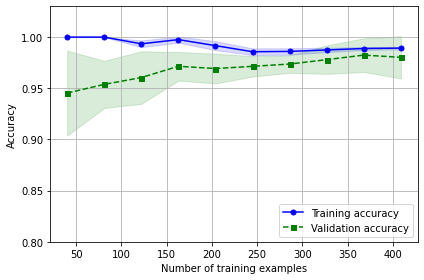

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',random_state=1,
                                           solver='lbfgs',max_iter=10000))
#learning_curve関数で交差検証による正解率を算出
train_sizes,train_scores,test_scores = learning_curve(estimator=pipe_lr,
                                                      X=X_train,y=y_train,
                                                      train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=1)
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
plt.plot(train_sizes,train_mean,
         color='blue',marker='o',markersize=5,label='Training accuracy')


#fill_between関数で平均±標準誤差の幅を塗りつぬす
#訓練データのサイズtrain_sizes,透明度alpha,カラーblueを引数に指定
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,
         color='green',linestyle='--',marker='s',markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15,color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.03])
plt.tight_layout()
plt.show()

**6.3.2 検証曲線を使って過学習と学習不足を明らかにする**

訓練とテストの正解率をプロットするだけでなく、モデルのパラメータの値を変化させる。

例えばロジスティック回帰の逆正則化パラメータCを変化させる。

scikit-learnを使って検証曲線を作成する

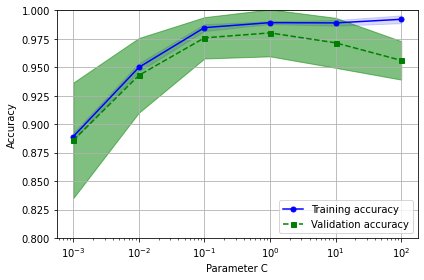

In [ ]:
from sklearn.model_selection import validation_curve
param_range = [0.001,0.01,0.1,1.0,10.0,100.0]
#validation_curve関数によりモデルのパラメータを変化させ、交差検証による正解率を算出
train_scores,test_scores = validation_curve(estimator=pipe_lr,
                                            X=X_train,y=y_train,
                                            param_name='logisticregression__C',
                                            param_range=param_range,
                                            cv=10)
                                            
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
plt.plot(param_range,train_mean,
         color='blue',marker='o',markersize=5,
         label='Training accuracy')
plt.fill_between(param_range,
                 train_mean + train_std, train_mean - train_std,
                 alpha=0.15,color='blue')
plt.plot(param_range,test_mean,
         color='green',linestyle='--',marker='s',markersize=5,
         label='Validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std, test_mean - test_std,
                 alpha=0.5,color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8,1.0])
plt.tight_layout()
plt.show()

**6.4 グリッドサーチによる機械学習モデルのチューニング**

グリッドサーチ　＝＝　最適化

**6.4.1 グリッドサーチを使ったハイパーパラメータのチューニング**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid = [{'svc__C' : param_range,'svc__kernel' : ['linear']},
                      {'svc__C' : param_range,'svc__gamma':param_range,
                       'svc__kernel' : ['rbf']}]
#ハイパーパラメータ値のリストparam_gridを指定し、
#グリッドサーチを行うGridSerchCVクラスをインスタンス化
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',cv=10,refit=True,n_jobs=-1)
gs = gs.fit(X_train,y_train)
#モデル最良スコアを出力
print(gs.best_score_)
#最良スコアとなるパラメータ値を出力
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [ ]:
clf = gs.best_estimator_
clf.fit(X_train,y_train)
print('Test accuracy: %3f' % clf.score(X_test,y_test))

Test accuracy: 0.973684


**6.4.2 入れ子式の交差検証によるアルゴリズムの選択**



In [ ]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',cv=2)
scores = cross_val_score(gs,X_train,y_train,scoring='accuracy',cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.974 +/- 0.015


In [ ]:
from sklearn.tree import DecisionTreeClassifier
#ハイパーパラメータ値として決定木の深さパラメータを指定し、
#グリッドサーチを行うGridSearchCVクラスをインスタンス化
gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth' : [1,2,3,4,5,6,7,None]}],
                  scoring='accuracy',cv=2)
scores = cross_val_score(gs,
                         X_train,y_train,
                         scoring='accuracy',cv=5)
print('CV accuracy: %3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.934066 +/- 0.016


**6.5 様々な性能評価指標**

precision recall f1-score

In [ ]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train,y_train)
y_pred = pipe_svc.predict(X_test)
#テストと予測データから金剛行列を作成
confmat = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


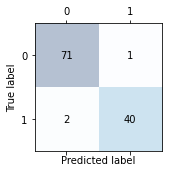

In [ ]:
#図のサイズを指定
fig,ax = plt.subplots(figsize=(2.5,2.5))
#matshow関数で行列からヒートマップを描写
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text (x=j, y=i,s=confmat[i,j],va='center',ha='center') #件数を表示
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

**6.5.2 分類モデルの適合率と再現率を最適化する**

再現率（recall)の最適化は悪性腫瘍の不検出の可能性を最小化するのに役立つ

適合率（precision)の最適化は悪性腫瘍があると予測する正確さを強化できる。ただし、その代償として悪性腫瘍の不検出がより頻繁に起きる（FNの値が大きい）

これらのバランスを取るために生み出されたのがF1score

In [ ]:
#適合率、再現率、F1scoreを出力
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score
print('Precision: %.3f' % precision_score(y_true=y_test,y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test,y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test,y_pred=y_pred))

Precision: 0.976
Recall: 0.952
F1: 0.964


グリッドサーチで性能指標はscoring引数で指定できる

In [ ]:
#カスタムの性能指標を出力
from sklearn.metrics import make_scorer,f1_score
c_gamma_range = [0.01,0.1,1.0,10.0]
 
param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]                      


scorer = make_scorer(f1_score,pos_label=0)
gs = GridSearchCV(estimator=pipe_svc,
                   param_grid=param_grid,
                   scoring=scorer,
                   cv=10,n_jobs=-1)




gs=gs.fit(X_train,y_train)

print(gs.best_score_)
print(gs.best_params_)                     

0.9861994953378878
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


**6.5.3ROC曲線をプロットする**

ROC曲線は性能に基づいて分類モデルを選択するために便利なツールである。



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


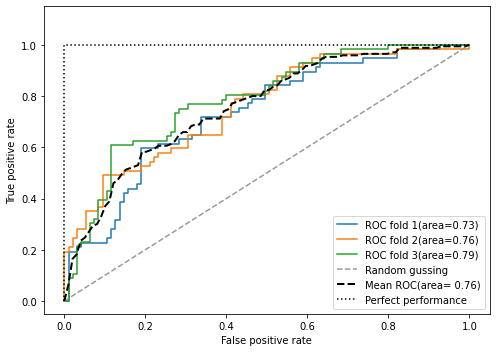

In [ ]:
from numpy.lib.function_base import interp
from sklearn.metrics import roc_curve,auc
from scipy import interp
#スケーリング、主成分分析、ロジスティック回帰を指定してpipelineクラスをインスタンス化
pipe_lr = make_pipeline(StandardScaler(),PCA(n_components=2),
                        LogisticRegression(penalty='l2',random_state=1,
                                           solver='lbfgs',C=100.0))

#二つの特徴量を抽出
X_train2 = X_train[:,[4,14]]
#層化分割交差検証イテレータを表すStratifiedKFOLDクラスをインスタンス化
cv = list(StratifiedKFold(n_splits=3).split(X_train,y_train))
fig = plt.figure(figsize=(7,5))
mean_tpr=0.0
#0から1までの間で１００個の要素を生成
mean_fpr = np.linspace(0,1,100)
all_tpr = []
for i,(train,test) in enumerate(cv):
  #predict_probaメソッドで確率を予測、fitに適合させる
  probas = pipe_lr.fit(X_train2[train],
                       y_train[train]).predict_proba(X_train2[test])
  #roc_curve関数でROC曲線の性能を計算してプロット
  fpr,tpr,thresholds = roc_curve(y_train[test],probas[:,1],pos_label=1)
  mean_tpr += interp(mean_fpr,fpr,tpr) #fprとtprの線型空間
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr,tpr)
  plt.plot(fpr,tpr,label='ROC fold %d(area=%0.2f)' % (i+1,roc_auc))

#当て推量プロット
plt.plot([0,1],[0,1],
         linestyle='--',color=(0.6,0.6,0.6),label='Random gussing')
#FPR,TPR,ROC,AUCそれぞれの平均を計算してプロット
mean_tpr /= len(cv)
mean_tpr[-1] =1.0
mean_auc=auc(mean_fpr,mean_tpr)
plt.plot(mean_fpr,mean_tpr,'k--',
         label='Mean ROC(area= %0.2f)' % mean_auc,lw=2)
#完全に予測が正解した時のROC曲線をプロット
plt.plot([0,0,1],[0,1,1],
         linestyle=':',color='black',label='Perfect performance')

plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.15])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


**6.5.4多クラス分類のための性能指標**

sklearnにはマクロとマイクロも実装されている。

一対全分類を通じてそれらを性能指標を多クラス問題に拡張するものである。



In [ ]:
pre_scorer = make_scorer(score_func=precision_score,
                         pos_label=1,
                         greater_is_better=True,
                         average='micro')

**6.6クラスの不均衡に対処する**

In [ ]:
X_imb = np.vstack((X[y==0],X[y==1][:40]))
y_imb = np.hstack((y[y==0],y[y==1][:40]))

In [ ]:
y_pred =  np.zeros(y_imb.shape[0])
np.mean(y_pred ==y_imb) *100

89.92443324937027

In [ ]:
#アップサンプリング
from sklearn.utils import resample
print('Number of class 1 example before:', X_imb[y_imb == 1].shape[0])

#データ点の個数がクラス０と同じになるまで新しいデータ点を復元抽出
X_upsampled,y_upsampled = resample(X_imb[y_imb==1],
                                   y_imb[y_imb==1],
                                   replace=True,
                                   n_samples=X_imb[y_imb==0].shape[0],
                                   random_state=123)
print('Number of class 1 example after:', X_upsampled.shape[0])



Number of class 1 example before: 40
Number of class 1 example after: 357


In [ ]:
X_bal = np.vstack((X[y==0],X_upsampled))
y_bal = np.hstack((y[y==0],y_upsampled))
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0